# PRI Lab 1

## Exercise 1

In [1]:
from wordcloud import WordCloud

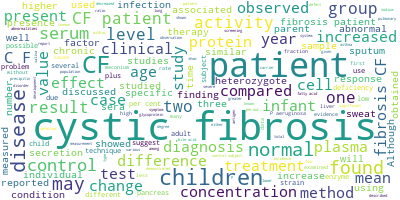

In [2]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_color="steelblue")
with open('pri_cfc.txt', 'r') as f:
    wordcloud.generate(f.read())
wordcloud.to_image()

In [3]:
from sklearn.feature_extraction import text
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [4]:
def sklearn_vectorizer(documents, tfidf=False):
    vectorizer = text.CountVectorizer(stop_words="english")
    data = vectorizer.fit_transform(documents)
    features = vectorizer.get_feature_names_out()
    return data, features

In [5]:
documents = []
with open("pri_cfc.txt", 'r') as f:
    for line in f:
        documents.append(line)
doc_term_matrix, features = sklearn_vectorizer(documents)

In [6]:
number_topics = 10
alpha, beta = 0.2, 0.5
lda = LDA(n_components=number_topics, doc_topic_prior=alpha, topic_word_prior=beta)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(doc_topic_prior=0.2, topic_word_prior=0.5)

In [8]:
for topic_idx, topic in enumerate(lda.components_):
    #print top 5 terms in topic
    print("Topic %d:"%topic_idx, [features[i] for i in topic.argsort()[-5:]])

Topic 0: ['european', 'physiotherapists', 'fibromusculoelastic', 'fmh', 'percussor']
Topic 1: ['fibroblasts', 'cf', 'cystic', 'fibrosis', 'patients']
Topic 2: ['children', 'cf', 'cystic', 'fibrosis', 'patients']
Topic 3: ['amp', 'sexual', 'gmp', 'mannosidase', 'cyclic']
Topic 4: ['serum', 'normal', 'fibrosis', 'cystic', 'cf']
Topic 5: ['families', 'incidence', 'disease', 'cystic', 'fibrosis']
Topic 6: ['cystic', 'disease', 'disorders', 'genetic', 'screening']
Topic 7: ['cf', 'serum', 'patients', 'cystic', 'fibrosis']
Topic 8: ['cf', 'chloride', 'cystic', 'fibrosis', 'sweat']
Topic 9: ['disease', 'children', 'patients', 'fibrosis', 'cystic']


## Exercise 2

In [9]:
import concepts
import numpy as np, pandas as pd

In [10]:
doc_topic_incidence_matrix = lda.transform(doc_term_matrix)
bool_data = np.where(doc_topic_incidence_matrix > 0.01, 1, 0)

In [11]:
matrix = np.where(bool_data==0, '', bool_data)
matrix = np.where(matrix=="1", "X", matrix)
df = pd.DataFrame(data=matrix, columns=["topic_"+str(i) for i in range(number_topics)])
df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,,,X,,,,,,,
1,,,,,,,,X,,
2,,,X,,,,,X,,
3,,,X,X,X,,,,X,
4,,,,,,,,X,,


In [12]:
df.to_csv("df.csv", index=True, header=True, sep=',')
dc = concepts.Context.fromfile("df.csv", frmat="csv")

In [13]:
print(dc.extension(["topic_1", "topic_2"]))
print(dc.intension(["4"]))

('5', '6', '10', '11', '47', '48', '54', '79', '80', '87', '94', '100', '109', '114', '151', '162', '164', '173', '176', '178', '180', '182', '186', '201', '228', '237', '252', '257', '319', '324', '325', '353', '368', '381', '393', '414', '425', '427', '456', '458', '459', '462', '468', '478', '507', '508', '512', '513', '553', '554', '555', '576', '578', '579', '588', '591', '607', '614', '655', '660', '662', '668', '671', '679', '682', '691', '695', '717', '727', '729', '752', '753', '792', '798', '799', '811', '832', '838', '857', '859', '864', '873', '892', '902', '907', '912', '916', '924', '925', '937', '938', '968', '973', '998', '1004', '1029', '1061', '1064', '1070', '1074', '1077', '1080', '1090', '1093', '1094', '1102', '1107', '1153', '1164', '1179', '1189', '1204', '1226')
('topic_7',)


In [14]:
for extent, intent in dc.lattice:
    print("%r %r" % (extent, intent))
    break #comment to fully display the lattice

('427', '512', '579', '655', '662', '798', '832', '838', '892', '907', '937', '938', '973', '1093', '1189') ('topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9')


In [ ]:
dc.lattice.graphviz(view=True)